# Generator of Continue Random Variable with Mersenne Twister

In [64]:
import numpy as np
from RNG_Uniform import *

In [65]:
MT=MT19937()
MT.seed(3213)

In [239]:
def Expectation(Xn):
    return sum(Xn)/len(Xn)

def Variance(Xn):
    expect=Expectation(Xn)
    var=0
    for i in range(len(Xn)):
        var += pow((Xn[i]-expect),2)
    return(var/(len(Xn)-1))

# Uniform Law on $[a,b]$

In [240]:
def Uniform_Continue(a,b,size=1):
    if size==1:
        U = MT.uniform()
        return a + U*(b-a)
    res =[]
    for i in range(size):
        U = MT.uniform()
        res.append(a+U*(b-a))
    return res

Expectation : 0.9285435333420522
Variance : 11.935057823349615


(array([0.08534147, 0.08734167, 0.08617489, 0.07750739, 0.08592486,
        0.08567484, 0.08309126, 0.08284124, 0.0817578 , 0.07775742]),
 array([-4.99931884, -3.79943332, -2.59954779, -1.39966227, -0.19977675,
         1.00010877,  2.19999429,  3.39987981,  4.59976533,  5.79965085,
         6.99953637]),
 <a list of 10 Patch objects>)

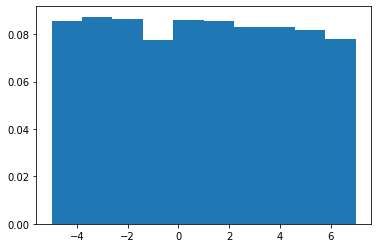

In [241]:
Sn = Uniform_Continue(-5,7,10000)
print("Expectation :",Expectation(Sn))
print("Variance :",Variance(Sn))
plt.hist(Sn,density=True)

# Exponential Law

Simulation with the inverse of the cumulative distribution function

In [70]:
def Exponential(lambdaa,size=1):
    if size==1:
        U = MT.uniform()
        return -1.0/lambdaa*np.log(U)
    res = []
    for i in range(size):
        U = MT.uniform()
        res.append(-1.0/lambdaa*np.log(U))
    return res

Expectation : 0.2512024272174719
Variance : 0.06291179317333273


(array([2.40479857e+00, 7.82120740e-01, 2.51917705e-01, 8.44476607e-02,
        2.60113048e-02, 8.55166184e-03, 3.20687319e-03, 7.12638487e-04,
        1.06895773e-03, 3.56319244e-04]),
 array([1.37795375e-06, 2.80648584e-01, 5.61295789e-01, 8.41942995e-01,
        1.12259020e+00, 1.40323741e+00, 1.68388461e+00, 1.96453182e+00,
        2.24517902e+00, 2.52582623e+00, 2.80647343e+00]),
 <a list of 10 Patch objects>)

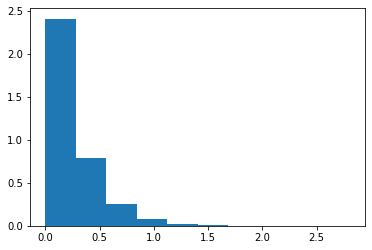

In [71]:
Sn = Exponential(4,10000)
print("Expectation :",Expectation(Sn))
print("Variance :",Variance(Sn))
plt.hist(Sn,density=True)

## Gaussian Law

Box Muller method

In [72]:
def Gaussian(mu,sigma,size=1):
    if size==1:
        U1=MT.uniform()
        U2=MT.uniform()
        return (mu + np.sqrt(sigma)*np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2))
    res = []
    r = size%2
    for i in range(int(size/2)):
        U1=MT.uniform()
        U2=MT.uniform()
        res.append(mu + np.sqrt(sigma)*np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2))
        res.append(mu + np.sqrt(sigma)*np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2))
    if (r==1):
        U1=MT.uniform()
        U2=MT.uniform()
        res.append(mu + np.sqrt(sigma)*np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2))
    return res

Expectation : 4.993054035159221
Variance : 10.033037297492777


(array([2.16096687e-05, 1.08048344e-04, 5.25835272e-04, 1.76478961e-03,
        6.09392658e-03, 1.59479355e-02, 3.54902793e-02, 6.42095290e-02,
        9.74668091e-02, 1.18276920e-01, 1.22425976e-01, 1.05793735e-01,
        7.53529148e-02, 4.40693177e-02, 2.10838334e-02, 8.09642255e-03,
        2.66519247e-03, 7.41931959e-04, 1.72877350e-04, 2.16096687e-05]),
 array([-9.11150691, -7.72325332, -6.33499974, -4.94674616, -3.55849258,
        -2.170239  , -0.78198541,  0.60626817,  1.99452175,  3.38277533,
         4.77102892,  6.1592825 ,  7.54753608,  8.93578966, 10.32404324,
        11.71229683, 13.10055041, 14.48880399, 15.87705757, 17.26531116,
        18.65356474]),
 <a list of 20 Patch objects>)

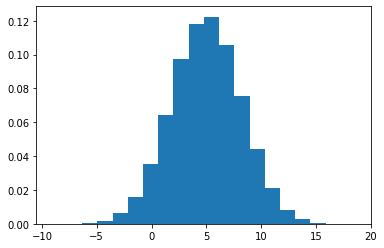

In [73]:
Sn = Gaussian(5,10,100001)
print("Expectation :",Expectation(Sn))
print("Variance :",Variance(Sn))
plt.hist(Sn,bins=20,density=True)

In [225]:
def Gaussian_vector(Mu,Sigma,n):
    """
    return a gaussian vector of size n 
    here Mu should be a vector (numpy) and Sigma a Matrix n*n
    """
    L = np.linalg.cholesky(Sigma)
    gauss = np.asarray(Gaussian(0,1,n))
    #print(np.dot(L,gauss)
    return Mu + np.dot(np.dot(L,gauss),L.T)

In [235]:
n = int(Uniform_Continue(2,10))
S = np.eye(n)
for i in range(n):
    for j in range(i+1,n):
        U = Uniform_Continue(-1,1,1)
        S[i,j] = U
        S[j,i] = U
print(S)
M = np.zeros(n)
print(M)

[[ 1.         -0.36800803 -0.51225494]
 [-0.36800803  1.         -0.46456405]
 [-0.51225494 -0.46456405  1.        ]]
[0. 0. 0.]


In [236]:
gauss = Gaussian_vector(M,S,n)
print(gauss)

[ 1.79986213 -0.55129839 -2.02295881]


## Gamma law

Following the paper of $\textit{Debasis Kundu1 Rameshwar D. Gupta}$, A Convenient Way of Generating Gamma Random Variables Using Generalized Exponential Distribution.

We use the following properties
- Scaling property : $ \it{Gamma}(k,\theta) \sim \theta * \it{Gamma}(k,1)$
- $\sum_{i=1}^n \mathcal{E}(1) \sim \it{Gamma}(n,1)$
- Shape-addition property : $\it{Gamma}(k,1) \sim \it{Gamma}(n,1) + \it{Gamma}(\delta,1)$ with $\delta \in [0,1]$

Note that $\theta \left(\xi - \sum_{i=1}^{\lfloor k \rfloor} ln(U_i)\right) \sim \it{Gamma}(k,\theta)$ where $\xi$ is a $\it{Gamma}(\theta,k)$

$\xi$ is the most difficult to simulate, we use the Ahrens-Dieter acceptance–rejection method with the majorization function
$
g_k(x) = \left\{
    \begin{array}{ll}
        \frac{x^{k-1}}{\Gamma(k)}& x \in (0,1) \\
        \frac{e^{-x}}{\Gamma(k)}& x \ge 1
    \end{array}
\right.
$

In [110]:
def Gamma(k,theta,size=1,max_iter=1000):
    e = np.exp(1)
    n = int(k)
    delta = k - n
    if (size == 1):
        gamma1 = 0 #Correspond to Gamma(delta,1)
        if ( delta > 0):
            it = 0
            while (it <= max_iter):
                U1 = MT.uniform()
                U2 = MT.uniform()
                U3 = MT.uniform()
                if (U1 < e / (e+delta)): #that mean we are on x in (0,1)
                    g = pow(U2,1/delta) #we generate g from the probability density link to the majorization function g
                    if (U3 < np.exp(-g)):#acceptance-rejection
                        gamma1 = g
                        break
                else:#that mean we are on x greater than 1
                    g = 1 - np.log(U2)
                    if (U3 < pow(g,delta-1)):
                        gamma1 = g
                        break
                it +=1
                if (it == max_iter):
                    "Algo didn't converge"
                    return 0
        return theta*(gamma1 - sum(np.log(Uniform_Continue(0,1,n))))
    res = []
    for i in range(size):
        ggamma1 = 0
        if ( delta > 0):
            it = 0
            while (it <= max_iter):
                U1 = MT.uniform()
                U2 = MT.uniform()
                U3 = MT.uniform()
                if (U1 < e / (e+delta)):
                    g = pow(U2,1/delta)
                    if (U3 < np.exp(-g)):
                        gamma1 = g
                        break
                else:
                    g = 1 - np.log(U2)
                    if (U3 < pow(g,delta-1)):
                        gamma1 = g
                        break
                it +=1
                if (it == max_iter):
                    "Algo didn't converge"
                    return 0
        res.append(theta*(gamma1 - sum(np.log(Uniform_Continue(0,1,n)))))
    return res
    

Expectation : 13.349456297408137
Variance : 77.58533654661372


(array([1.19813217e-02, 3.26161546e-02, 4.68360759e-02, 5.50803806e-02,
        5.60973788e-02, 5.55076402e-02, 5.07054832e-02, 4.60477518e-02,
        4.08002820e-02, 3.50954638e-02, 3.05279986e-02, 2.51060142e-02,
        2.16759020e-02, 1.82879140e-02, 1.44907196e-02, 1.18308782e-02,
        9.79688186e-03, 7.96147095e-03, 6.18623744e-03, 5.42198437e-03,
        4.01985079e-03, 3.12922516e-03, 2.59364624e-03, 2.20249310e-03,
        1.60071903e-03, 1.35399166e-03, 1.05912236e-03, 8.66554661e-04,
        6.80004699e-04, 4.93454738e-04, 3.49028961e-04, 2.94869294e-04,
        2.28674147e-04, 1.86549962e-04, 1.38408036e-04, 1.38408036e-04,
        5.41596663e-05, 7.82306291e-05, 4.81419256e-05, 6.01774070e-05,
        4.81419256e-05, 2.40709628e-05, 6.01774070e-06, 1.80532221e-05,
        0.00000000e+00, 6.01774070e-06, 6.01774070e-06, 6.01774070e-06,
        2.40709628e-05, 6.01774070e-06]),
 array([ 0.10036691,  1.76212013,  3.42387335,  5.08562657,  6.7473798 ,
         8.40913302, 

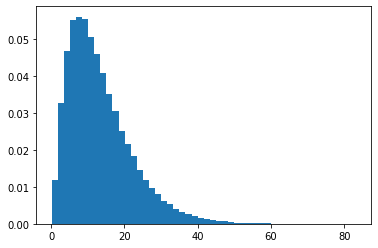

In [111]:
k, theta = 2.3 , 5.8
Sn = Gamma(k,theta,100000)
print("Expectation :",Expectation(Sn))
print("Variance :",Variance(Sn))
plt.hist(Sn,bins=50,density=True)

## Pareto Law $(x_m,\alpha)$

In [85]:
def Pareto(xm,alpha,size=1):
    if size ==1:
        U = MT.uniform()
        return xm / pow(U,1/alpha)
    res = []
    for i in range(size):
        U = MT.uniform()
        res.append(xm / pow(U,1/alpha))
    return res

Expectation : 6.325703149518028
Variance : 7911.217039112849


(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        1.02004526, 0.73445414, 0.51244746, 0.37180731, 0.322233  ,
        0.23386141, 0.2053023 , 0.17081582, 0.14710637, 0.11746955,
        0.12501347, 0.11100334, 0.08998815, 0.07490031, 0.07543916,
        0.06520099, 0.05604052, 0.04149154, 0.04903546, 0.04364694,
        0.03179222, 0.03556418, 0.03179222, 0.0220929 , 0.0242483 ,
        0.02963681, 0.025326  , 0.01885979, 0.01993749, 0.02047634,
        0.02047634, 0.01670439, 0.01239358, 0.01454898, 0.01131587,
        0.01508783, 0.01131587, 0.00916047, 0.01077702, 0.01131587,
        0.00646621, 0.01023817, 0.01293243, 0.00377196, 0.00646621]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9

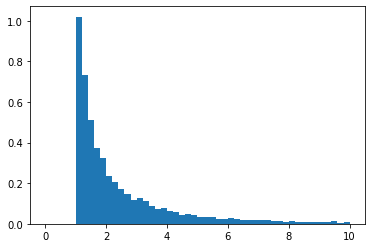

In [98]:
Sn = Pareto(1,1.16,10000)
print("Expectation :",Expectation(Sn))
print("Variance :",Variance(Sn))
plt.hist(Sn,range=[0,10],bins=50,density=True)

## $\chi^2(k)$ Law

In [124]:
def khi_deux(k,size=1):
    if size == 1:
        return sum(np.asarray(Gaussian(0,1,k))**2)
    res = []
    for i in range(size):
        res.append(sum(np.asarray(Gaussian(0,1,k))**2))
    return res

Expectation : 5.9667659520134
Variance : 11.836768352321585


(array([0.01195551, 0.03700515, 0.06490135, 0.08995099, 0.11386201,
        0.1335981 , 0.14137867, 0.13283902, 0.1335981 , 0.12259143,
        0.1227812 , 0.10797914, 0.09849064, 0.08615559, 0.07363077,
        0.06357296, 0.05920825, 0.05047883, 0.04023124, 0.03472791,
        0.03320975, 0.02410079, 0.01973608, 0.01840769, 0.01309413,
        0.0113862 , 0.01100666, 0.01081689, 0.00645218, 0.00626241,
        0.00455448, 0.00284655, 0.00132839, 0.00360563, 0.00227724,
        0.00170793, 0.00151816, 0.00113862, 0.00075908, 0.00037954,
        0.00056931, 0.00113862, 0.00056931, 0.00037954, 0.00018977,
        0.00037954, 0.00018977, 0.00037954, 0.00018977, 0.00018977]),
 array([ 0.2001403 ,  0.72709392,  1.25404754,  1.78100116,  2.30795477,
         2.83490839,  3.36186201,  3.88881563,  4.41576925,  4.94272286,
         5.46967648,  5.9966301 ,  6.52358372,  7.05053733,  7.57749095,
         8.10444457,  8.63139819,  9.15835181,  9.68530542, 10.21225904,
        10.73921266, 11.26

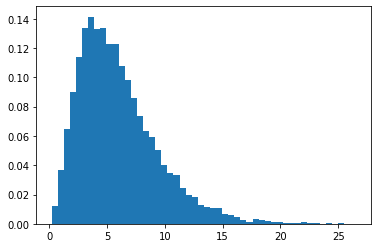

In [125]:
Sn = khi_deux(6,10000)
print("Expectation :",Expectation(Sn))
print("Variance :",Variance(Sn))
plt.hist(Sn,bins=50,density=True)